In [1]:
#%matplotlib notebook

In [143]:
import matplotlib.pyplot as plt 
import pandas as pd 
import scipy.stats as st 
import numpy as np
from scipy.stats import linregress

In [3]:
mouse_metadata = r"C:\Users\omarm\OneDrive\Documents\GitHub\GWU-ARL-DATA-PT-12-2019-U-C\02-Homework\05-Matplotlib\Instructions\Pymaceuticals\data\Mouse_metadata.csv"
study_results = r"C:\Users\omarm\OneDrive\Documents\GitHub\GWU-ARL-DATA-PT-12-2019-U-C\02-Homework\05-Matplotlib\Instructions\Pymaceuticals\data\Study_results.csv"

In [4]:
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [5]:
combined_df = pd.merge(study_results, mouse_metadata, how ="left", on=["Mouse ID","Mouse ID"])
#combined_df.rename(columns={'Tumor Volume (mm3)': 'Tumor_Volume'}, inplace=True)
#combined_df = combined_df.set_index('Mouse ID')
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
regimen_df = combined_df.groupby("Drug Regimen")

regimen_mean = regimen_df["Tumor Volume (mm3)"].mean()
regimen_median = regimen_df["Tumor Volume (mm3)"].median()
regimen_variance = regimen_df["Tumor Volume (mm3)"].var()
regimen_std = regimen_df["Tumor Volume (mm3)"].std()
regimen_sem = regimen_df["Tumor Volume (mm3)"].sem()
regimen_tumor_volume = regimen_df["Tumor Volume (mm3)"].count()

regimen_stats_df = pd.DataFrame({"Mean": regimen_mean,
                                "Median": regimen_median,
                                "Variance": regimen_variance,
                                "Standard Deviation": regimen_std,
                               "SEM": regimen_sem,
                               "Number of Tumor": regimen_tumor_volume})
regimen_stats_df.index.name = "Drug Regimen"

regimen_stats_df


,Mean,Median,Variance,Standard Deviation,SEM,Number of Tumor
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884,161
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


In [7]:
x_axis = np.arange(len(regimen_df))

Text(0, 0.5, 'Number of Tumors')

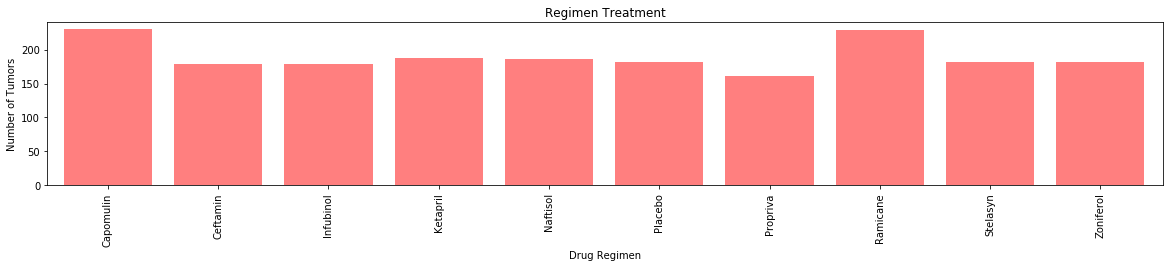

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
tick_locations = [value for value in x_axis]

drug_list = regimen_stats_df["Number of Tumor"].keys()

plt.figure(figsize=(20,3))
plt.bar(x_axis, regimen_stats_df["Number of Tumor"] , color = "r", alpha = 0.5,  align = "center")
plt.xticks(tick_locations, drug_list, rotation = "vertical")

plt.xlim(-0.55, len(x_axis)-0.43)
plt.ylim(0, max(regimen_stats_df["Number of Tumor"])+10)

plt.title("Regimen Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Tumors")


Text(0.5, 1.0, 'Regimen Treatment')

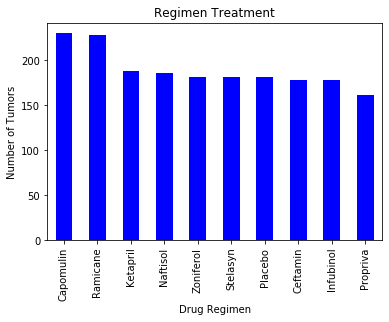

In [9]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

drug_regimen = combined_df["Drug Regimen"].value_counts()

drug_regimen_graph = drug_regimen.plot(kind = "bar", facecolor = "blue")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Tumors")
plt.title("Regimen Treatment")

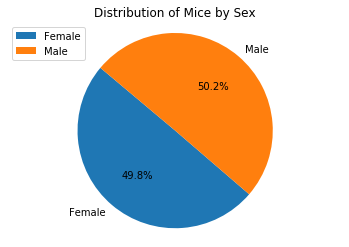

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
number_duplicates_mouse = combined_df.drop_duplicates(["Mouse ID"])

gender_count = number_duplicates_mouse.groupby(["Sex"]).size().to_frame("Count")

gender_list = gender_count.keys()

gender_pie = gender_count.plot(kind="pie", y=gender_list, startangle = 140, autopct = "%1.1f%%", title = ("Distribution of Mice by Sex"))
gender_pie.set_ylabel("")

plt.axis("equal")
plt.show()
plt.tight_layout()

C:\Users\omarm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


([<matplotlib.patches.Wedge at 0x27ed7e65208>,
 [Text(-1.1775773804745815, -0.230892860423667, 'Male'),
  Text(1.0794459321016998, 0.21165178872169366, 'Female')],
 [Text(-0.6869201386101724, -0.13468750191380574, '50.6%'),
  Text(0.5887886902372907, 0.11544643021183289, '49.4%')])

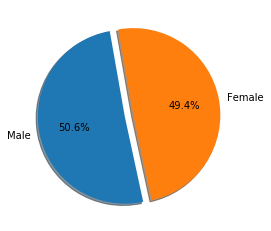

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = pd.DataFrame(combined_df["Sex"].value_counts())
labels = ["Male", "Female"]
explode = (0.1,0)
plt.pie(gender_count, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=100)

In [12]:
max_tumor = combined_df.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()
merged_df = max_tumor[["Mouse ID", "Timepoint"]].merge(combined_df, on = ["Mouse ID", "Timepoint"], how = "left")
capomulin = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]

#define 3 quartiles and calculate IQR

quartiles = capomulin.quantile([0.25, 0.50, 0.75])
upperbound_quartile = quartiles[0.75]
lowerbound_quartile = quartiles[0.25]
iqr = upperbound_quartile - lowerbound_quartile

lowerbound = lowerbound_quartile - (1.5*iqr)
upperbound = upperbound_quartile + (1.5*iqr)

capomulin.loc[(capomulin < lowerbound) | (capomulin > upperbound)]


#print(outliers)






Series([], Name: Tumor Volume (mm3), dtype: float64)

In [13]:
ramicane = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]

quartiles = ramicane.quantile([0.25, 0.50, 0.75])
upperbound_quartile = quartiles[0.75]
lowerbound_quartile = quartiles[0.25]
iqr = upperbound_quartile - lowerbound_quartile

lowerbound = lowerbound_quartile - (1.5*iqr)
upperbound = upperbound_quartile + (1.5*iqr)

outliers = ramicane.loc[(ramicane < lowerbound) | (ramicane > upperbound)]


print(outliers)



Series([], Name: Tumor Volume (mm3), dtype: float64)


In [14]:
infubinol = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]

quartiles = infubinol.quantile([0.25, 0.50, 0.75])
upperbound_quartile = quartiles[0.75]
lowerbound_quartile = quartiles[0.25]
iqr = upperbound_quartile - lowerbound_quartile

lowerbound = lowerbound_quartile - (1.5*iqr)
upperbound = upperbound_quartile + (1.5*iqr)

outliers = infubinol.loc[(infubinol < lowerbound) | (infubinol > upperbound)]


print(outliers)


31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [15]:
ceftamin = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

quartiles = ceftamin.quantile([0.25, 0.50, 0.75])
upperbound_quartile = quartiles[0.75]
lowerbound_quartile = quartiles[0.25]
iqr = upperbound_quartile - lowerbound_quartile

lowerbound = lowerbound_quartile - (1.5*iqr)
upperbound = upperbound_quartile + (1.5*iqr)

outliers = ceftamin.loc[(ceftamin < lowerbound) | (ceftamin > upperbound)]


print(outliers)

Series([], Name: Tumor Volume (mm3), dtype: float64)


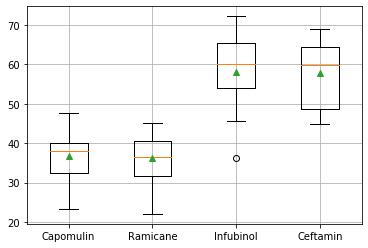

In [16]:
plt.boxplot([capomulin, ramicane, infubinol, ceftamin], labels = ["Capomulin","Ramicane","Infubinol","Ceftamin"], showmeans= True)
plt.grid()
plt.show()


Text(0, 0.5, 'Timepoint')

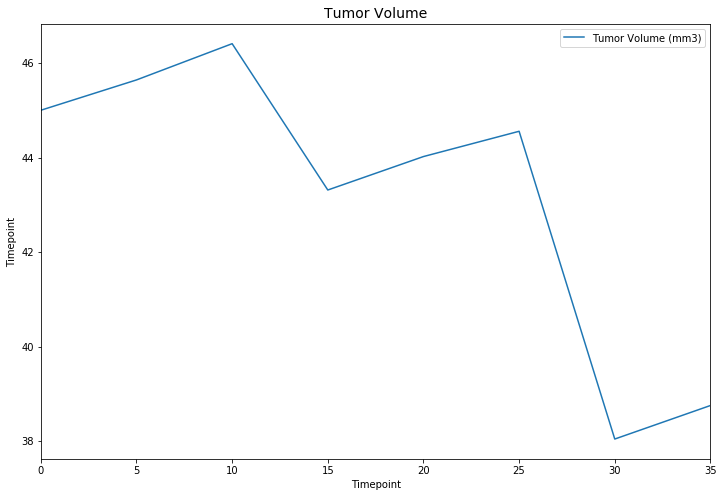

In [71]:
capomulin_drug = combined_df[combined_df["Drug Regimen"]=="Capomulin"]
capomulin_drug

mouse_data = capomulin_drug[capomulin_drug["Mouse ID"] == "j246"]


mouse_data
ax=mouse_data.plot(x="Timepoint", y=["Tumor Volume (mm3)"],figsize=(12,8))
ax.set_title("Tumor Volume", fontsize=14)
plt.ylabel("Timepoint")

Text(0, 0.5, 'Tumor Volume')

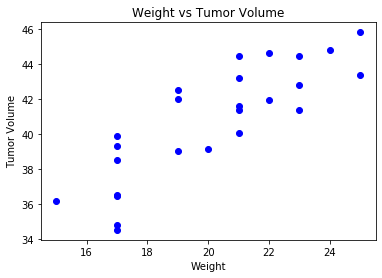

In [105]:
mouse_avg = capomulin_drug.groupby("Mouse ID").mean()
mouse_avg

plt.scatter(x=mouse_avg["Weight (g)"], y=mouse_avg["Tumor Volume (mm3)"],color='blue', marker='o')

plt.title("Weight vs Tumor Volume",fontsize=12)
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")


In [140]:
mouse_avg = capomulin_drug.groupby("Mouse ID").mean()


weight = mouse_avg.iloc[:,4]
tumor = mouse_avg.iloc[:,1]

correlation1= st.pearsonr(mouse_avg['Weight (g)'],mouse_avg['Tumor Volume (mm3)'])
correlation1

correlation2 = st.pearsonr(weight,tumor)
print(correlation1,correlation2)

(0.8419363424694717, 1.322572243471279e-07) (0.8419363424694717, 1.322572243471279e-07)


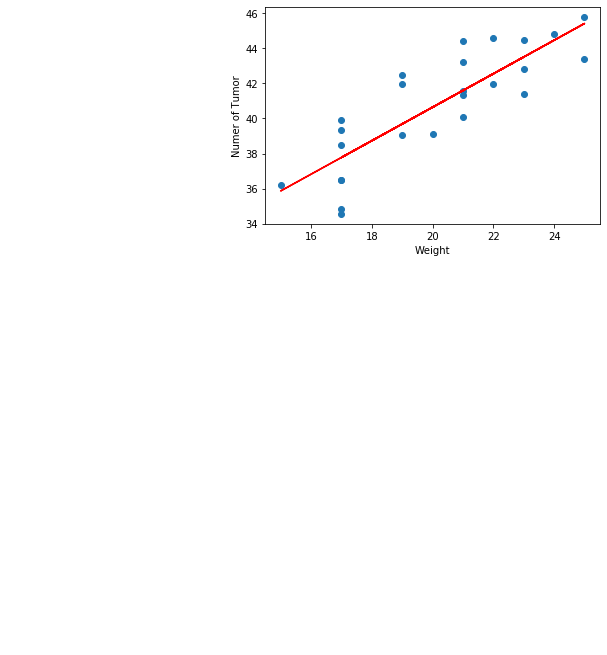

In [147]:
x_values = mouse_avg["Weight (g)"]
y_values = mouse_avg["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regression_value = x_values * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regression_value,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Numer of Tumor')
plt.show()